In [1]:
# Using OS library to load our image folder 

import os

train_path = "train"
test_path = "test"

# List all files in the folder
train_list = os.listdir(train_path)
test_list = os.listdir(test_path)


# Print the list of files
print(train_list)

['Ajwa', 'Galaxy', 'Mejdool', 'Meneifi', 'NabtatAli', 'Rutab', 'Shaishe', 'Sokari', 'Sugaey']


In [2]:
# All oother libraries we use further

import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential


#loading our path to variable data dir for operations on image, 
train_data_dir = pathlib.Path(train_path)
test_data_dir = pathlib.Path(test_path)
train_data_dir

WindowsPath('train')

In [3]:
train_image_count = len(list(train_data_dir.glob('*/*.jpg')))
train_image_count


1156

# Dataset samples counts per label charts for both training and test sets

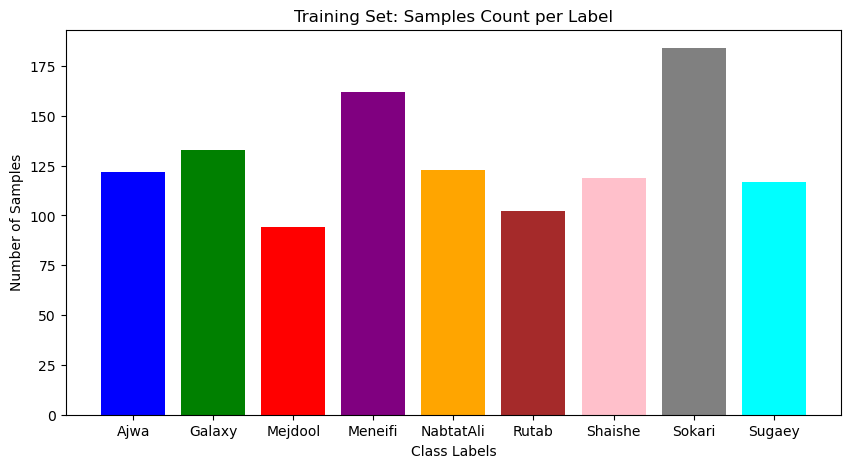

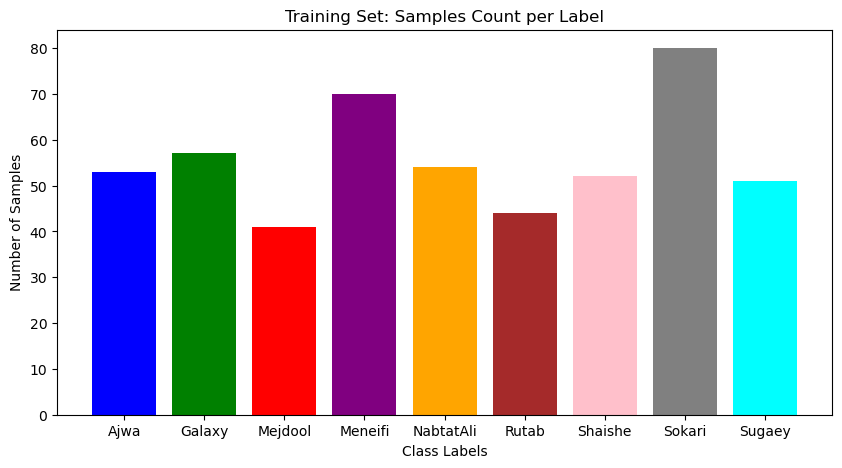

In [4]:
# Get the list of subdirectories (labels) in the training set
train_labels = os.listdir(train_path)
# Get the count of samples per label in the training set
train_counts = [len(os.listdir(os.path.join(train_path, label))) for label in train_labels]

# Get the list of subdirectories (labels) in the test set
test_labels = os.listdir(test_path)
# Get the count of samples per label in the test set
test_counts = [len(os.listdir(os.path.join(test_path, label))) for label in test_labels]


# Define different colors for each class
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan']

# Plot the bar chart for the training set with different colors
plt.figure(figsize=(10, 5))
plt.bar(train_labels, train_counts, color=colors)
plt.title('Training Set: Samples Count per Label')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()

# Plot the bar chart for the test set with different colors
plt.figure(figsize=(10, 5))
plt.bar(test_labels, test_counts, color=colors)
plt.title('Training Set: Samples Count per Label')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()

# Data Preprocessing - Balancing the data by taking equal random samples from the training dataset

In [5]:
import random

#List of all the date images in training data
Ajwa_training = list(train_data_dir.glob('Ajwa/*'))
Ajwa_training = random.sample(Ajwa_training, k=94)


Galaxy_training = list(train_data_dir.glob('Galaxy/*'))
Galaxy_training = random.sample(Galaxy_training, k=94)


Mejdool_training = list(train_data_dir.glob('Mejdool/*'))
Mejdool_training = random.sample(Mejdool_training, k=94)


Meneifi_training = list(train_data_dir.glob('Meneifi/*'))
Meneifi_training = random.sample(Meneifi_training, k=94)


NabtatAli_training = list(train_data_dir.glob('NabtatAli/*'))
NabtatAli_training = random.sample(NabtatAli_training, k=94)


Rutab_training = list(train_data_dir.glob('Rutab/*'))
Rutab_training = random.sample(Rutab_training, k=94)


Shaishe_training = list(train_data_dir.glob('Shaishe/*'))
Shaishe_training = random.sample(Shaishe_training, k=94)


Sokari_training = list(train_data_dir.glob('Sokari/*'))
Sokari_training = random.sample(Sokari_training, k=94)


Sugaey_training = list(train_data_dir.glob('Sugaey/*'))
Sugaey_training = random.sample(Sugaey_training, k=94)


In [6]:
#List of all the date images in testing data
Ajwa_test = list(test_data_dir.glob('Ajwa/*'))
Galaxy_test = list(test_data_dir.glob('Galaxy/*'))
Mejdool_test = list(test_data_dir.glob('Mejdool/*'))
Meneifi_test = list(test_data_dir.glob('Meneifi/*'))
NabtatAli_test = list(test_data_dir.glob('NabtatAli/*'))
Rutab_test = list(test_data_dir.glob('Rutab/*'))
Shaishe_test = list(test_data_dir.glob('Shaishe/*'))
Sokari_test = list(test_data_dir.glob('Sokari/*'))
Sugaey_test = list(test_data_dir.glob('Sugaey/*'))

# Data Labelling

In [7]:
#Now creating 2 dic for training purpose

# Image Dic
training_image_dict = {
    'Ajwa': list(Ajwa_training),
    'Galaxy': list(Galaxy_training),
    'Mejdool': list(Mejdool_training),
    'Meneifi': list(Meneifi_training),
    'NabtatAli': list(NabtatAli_training),
    'Rutab': list(Rutab_training),
    'Shaishe': list(Shaishe_training),
    'Sokari': list(Sokari_training),
    'Sugaey': list(Sugaey_training),

}
#label dic
training_lable_dict = {
    'Ajwa': 0,
    'Galaxy': 1,
    'Mejdool': 2,
    'Meneifi': 3,
    'NabtatAli': 4,
    'Rutab': 5,
    'Shaishe': 6,
    'Sokari': 7,
    'Sugaey': 8,
}

In [8]:
#Now creating 2 dic for testing purpose

# Image Dic
test_image_dict = {
    'Ajwa': list(Ajwa_test),
    'Galaxy': list(Galaxy_test),
    'Mejdool': list(Mejdool_test),
    'Meneifi': list(Meneifi_test),
    'NabtatAli': list(NabtatAli_test),
    'Rutab': list(Rutab_test),
    'Shaishe': list(Shaishe_test),
    'Sokari': list(Sokari_test),
    'Sugaey': list(Sugaey_test),

}
#label dic
test_lable_dict = {
    'Ajwa': 0,
    'Galaxy': 1,
    'Mejdool': 2,
    'Meneifi': 3,
    'NabtatAli': 4,
    'Rutab': 5,
    'Shaishe': 6,
    'Sokari': 7,
    'Sugaey': 8,
}

In [9]:
#resizing our image and creating x and y lists which takes resized image and its label from the above dic
#For training

X_train = []
y_train = []


for file_name, images in training_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        try:
          resized_image = cv2.resize(img, (180,180), interpolation=cv2.INTER_AREA)
          X_train.append(resized_image)
          y_train.append(training_lable_dict[file_name])
        except:
          break

In [10]:
len(X_train)

846

In [11]:
X_train

[array([[[224, 226, 227],
         [224, 226, 227],
         [224, 226, 227],
         ...,
         [228, 229, 233],
         [228, 229, 233],
         [228, 229, 233]],
 
        [[224, 226, 227],
         [224, 226, 227],
         [224, 226, 227],
         ...,
         [228, 229, 233],
         [228, 229, 233],
         [227, 228, 232]],
 
        [[224, 226, 227],
         [224, 226, 227],
         [224, 226, 227],
         ...,
         [228, 229, 233],
         [227, 228, 232],
         [226, 227, 231]],
 
        ...,
 
        [[220, 219, 221],
         [220, 219, 221],
         [220, 219, 221],
         ...,
         [223, 222, 224],
         [223, 222, 224],
         [223, 222, 224]],
 
        [[220, 219, 221],
         [220, 219, 221],
         [220, 219, 221],
         ...,
         [223, 222, 224],
         [223, 222, 224],
         [223, 222, 224]],
 
        [[220, 219, 221],
         [220, 219, 221],
         [220, 219, 221],
         ...,
         [223, 222, 224],
  

In [84]:
y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [12]:
#For testing

X_test = []
y_test = []


for file_name, images in test_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        try:
          resized_image = cv2.resize(img, (180,180), interpolation=cv2.INTER_AREA)
          X_test.append(resized_image)
          y_test.append(test_lable_dict[file_name])
        except:
          break

In [13]:
X_test[0].shape

(180, 180, 3)

In [14]:
len(X_test)

502

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [16]:
#sclaing our image vector data for better accuracy

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Data Augmentation for better results

In [17]:
# Data Augmentation
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
    
    layers.experimental.preprocessing.RandomContrast(0.1),
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (180, 180, 3)),
])

# Model Part

In [30]:
# Define the CNN model
model = tf.keras.Sequential([
    #Augmentation layer
    data_augmentation,
        
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape = (180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Dropout(0.2),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Build the model
model.build((None, 180, 180, 3))

# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [31]:
# Train the model
history = model.fit(X_train_scaled, y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data=(X_test, y_test)
                   )

Epoch 1/15
27/27 [==============================] - 31s 1s/step - loss: 2.1568 - accuracy: 0.1749 - val_loss: 109.1923 - val_accuracy: 0.3367
Epoch 2/15
27/27 [==============================] - 28s 1s/step - loss: 1.4931 - accuracy: 0.4504 - val_loss: 129.2214 - val_accuracy: 0.5438
Epoch 3/15
27/27 [==============================] - 29s 1s/step - loss: 1.2350 - accuracy: 0.5615 - val_loss: 111.8617 - val_accuracy: 0.6315
Epoch 4/15
27/27 [==============================] - 29s 1s/step - loss: 0.9476 - accuracy: 0.6643 - val_loss: 131.3893 - val_accuracy: 0.5857
Epoch 5/15
27/27 [==============================] - 30s 1s/step - loss: 0.7923 - accuracy: 0.7352 - val_loss: 135.4332 - val_accuracy: 0.6972
Epoch 6/15
27/27 [==============================] - 30s 1s/step - loss: 0.9058 - accuracy: 0.6974 - val_loss: 84.7970 - val_accuracy: 0.7271
Epoch 7/15
27/27 [==============================] - 29s 1s/step - loss: 0.6115 - accuracy: 0.7884 - val_loss: 71.7392 - val_accuracy: 0.8127
Epoch 8/

In [32]:
# Evaluate the model
_, accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print('Accuracy:', accuracy)

16/16 [==============================] - 4s 244ms/step - loss: 0.4288 - accuracy: 0.8566
Accuracy: 0.8565737009048462


In [33]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes for the test set and Convert predicted probabilities to class labels
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)



print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


16/16 [==============================] - 4s 265ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.91      0.72      0.80        57
           2       0.82      0.88      0.85        41
           3       0.65      0.89      0.75        70
           4       0.87      0.72      0.79        54
           5       0.80      0.84      0.82        44
           6       1.00      0.35      0.51        52
           7       0.72      0.85      0.78        80
           8       0.71      0.86      0.78        51

    accuracy                           0.79       502
   macro avg       0.83      0.79      0.78       502
weighted avg       0.82      0.79      0.78       502



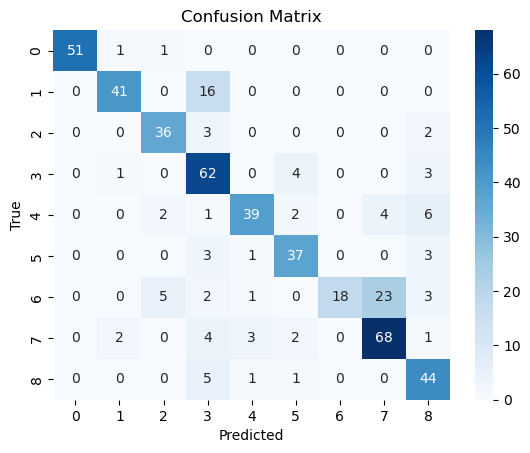

In [34]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
class_labels = np.unique(y_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

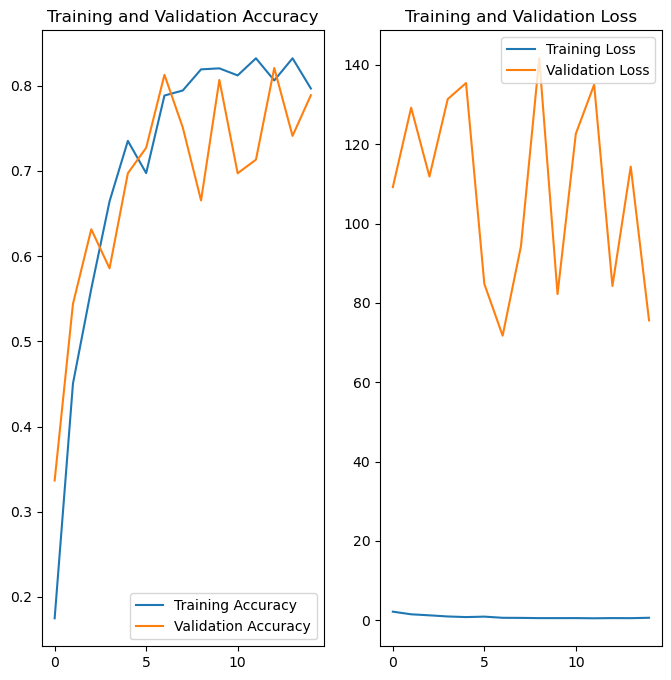

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()